In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('Position_Salaries.csv')


ERROR! Session/line number was not unique in database. History logging moved to new session 179


In [32]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [84]:
#splitting into independent and dependent variables
X= dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values

In [85]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [86]:
# fitting the whole model using linear regression
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,y)

LinearRegression()

In [87]:
def plotlinear(X,y):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, model.predict(X), color = 'blue')
    plt.title(' Regression)')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.show()

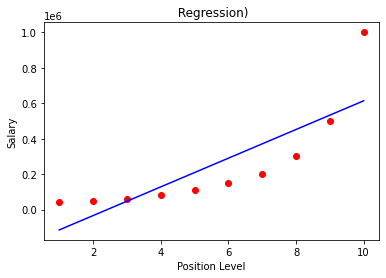

In [88]:
plotlinear(X,y)

In [127]:
# turning the x features into polynomials of X^N
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
X2=lin_reg_2.fit(X_poly, y)

In [128]:
def plotpoly(X,y):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
    plt.title(' Regression)')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.show()

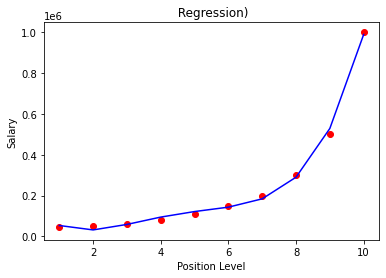

In [129]:
plotpoly(X,y)

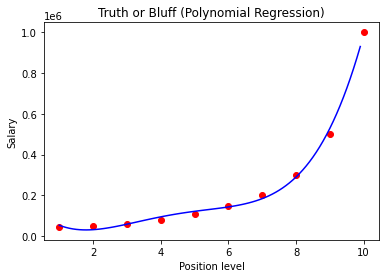

In [130]:
## smoothening out the curve by increasing the decimal number 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [134]:
# comparing linear prediction with polynomial regression

model.predict([[6.5]])

array([330378.78787879])

In [136]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

In [ ]:
# square brackets are to show that the array has 2 dimensions 